In [11]:
from langgraph.graph import StateGraph, START , END
from typing import TypedDict

In [ ]:
class BatsmanState(TypedDict):
    run:int
    balls:int
    four:int
    six:int

    strike_rate:float
    boundary_percent:float
    ball_per_boundary:float
    boundary_run:int
    batting_stat:str

In [ ]:
def calculate_sr(state:BatsmanState):
    strike_rate = (state['run']/state['balls'])*100
    return {'strike_rate': strike_rate}
# Runs from boundary 
def calculate_boundary_percent(state:BatsmanState):
    total_boundaries = state['four'] + state['six']
    if state['balls'] > 0:
        state['boundary_percent'] = (total_boundaries / state['balls']) * 100
    else:
        state['boundary_percent'] = 0.0
    return {'boundary_percent': state['boundary_percent']}

def calculate_ball_per_boundary(state:BatsmanState):
    total_boundaries = state['four'] + state['six']
    if total_boundaries > 0:
        state['ball_per_boundary'] = state['balls'] / total_boundaries
    else:
        state['ball_per_boundary'] = 0.0
    return {'ball_per_boundary': state['ball_per_boundary']}

def calculate_boundary_run(state:BatsmanState) :
    boundary_run = (state['four'] * 4) + (state['six'] *6)
    state['boundary_run'] = (boundary_run / state['run'] if state['run'] > 0 else 0.0) *100
    return {'boundary_run': state['boundary_run']}    

def summary(state:BatsmanState) :
    state['batting_stat'] = f"Runs: {state['run']}, Balls: {state['balls']}, Four: {state['four']}, Six: {state['six']}, Strike Rate: {state['strike_rate']:.2f}, Boundary Percent: {state['boundary_percent']:.2f}%, Ball per Boundary: {state['ball_per_boundary']:.2f}, Boundary Run: {state['boundary_run']:.2f}%"
    return state

In [42]:
graph= StateGraph(BatsmanState)

graph.add_node('calculate_strike_rate',calculate_sr)
graph.add_node('calculate_boundary_percent',calculate_boundary_percent)
graph.add_node('calculate_ball_per_boundary',calculate_ball_per_boundary)
graph.add_node('calculate_boundary_run',calculate_boundary_run)
graph.add_node('summary', summary)

graph.add_edge(START, 'calculate_strike_rate')
graph.add_edge(START, 'calculate_boundary_percent')
graph.add_edge(START, 'calculate_ball_per_boundary')
graph.add_edge(START, 'calculate_boundary_run')
graph.add_edge('calculate_strike_rate','summary')
graph.add_edge('calculate_boundary_percent','summary')
graph.add_edge('calculate_ball_per_boundary','summary')
graph.add_edge('calculate_boundary_run','summary')
graph.add_edge('summary', END)

workflow=graph.compile()

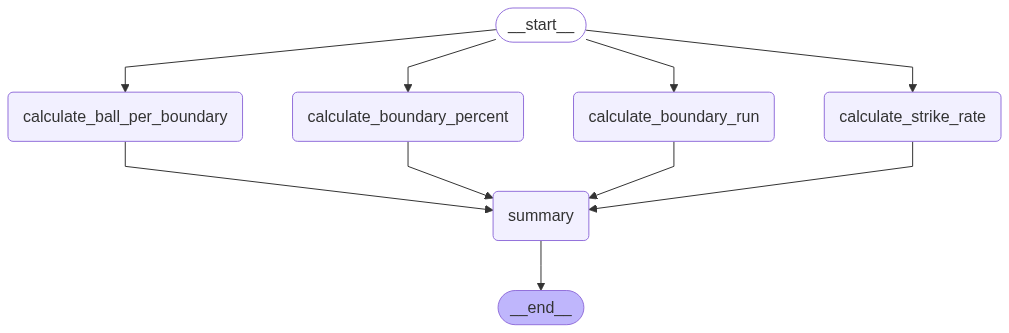

In [43]:
workflow

In [47]:
initial_state = {
    "run":100,   
    "balls":50,
    "four":10,
    "six":5,
}
workflow.invoke(initial_state)


KeyError: 'boundary_run'